#### Named Entity Recognition

In [ ]:
!pip install spacy
!pip install wordcloud

In [ ]:
###Execute below command through anaconda command prompt
!python -m spacy download en

     |████████████████████████████████| 12.0 MB 7.3 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
book = pd.read_csv("apple.txt", error_bad_lines = False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9972\541110312.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  book = pd.read_csv("apple.txt", error_bad_lines = False)
b'Skipping line 6: expected 1 fields, saw 14\n'


In [3]:
book

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""
5,I am very upset about the product as I checked...
6,Reason for 1 star is I ot an defective piece. ...
7,Got the Apple Macbook air on amazon discount s...
8,White line coming on screen in just three mont...
9,"Bought this product recently on 5 April, was w..."


In [5]:
name = "       bjfviygviuyv      "

name.strip()

'bjfviygviuyv'

In [6]:
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book[0:10]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [7]:
book

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [8]:
##Part Of Speech Tagging
#nlp = spacy.load('en')
nlp = spacy.load('en_core_web_sm')

In [45]:
one_block = book[1]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [46]:
one_block

"Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working on these (still mostly the document and slides either do not open in windows environment

In [47]:
for token in doc_block[:]:
    print(token, token.pos_)

Finally ADV
a DET
MacBook PROPN
possession NOUN
. PUNCT
Got VERB
it PRON
in ADP
50k NUM
in ADP
Diwali PROPN
sale NOUN
. PUNCT
Technically ADV
good ADJ
laptop NOUN
. PUNCT
Good ADJ
News.luxury NOUN
product NOUN
, PUNCT
niche NOUN
technology NOUN
, PUNCT
good ADJ
battery NOUN
life NOUN
, PUNCT
reliable ADJ
machine NOUN
( PUNCT
other ADJ
laptops NOUN
crash NOUN
and CCONJ
become VERB
defunct ADJ
in ADP
6 NUM
- SYM
10 NUM
years NOUN
) PUNCT
, PUNCT
no DET
anti ADJ
- NOUN
virus NOUN
required VERB
, PUNCT
security NOUN
of ADP
data NOUN
and CCONJ
transactions NOUN
much ADV
better ADV
. PUNCT
Terrific ADJ
sense NOUN
of ADP
possession NOUN
& CCONJ
pride NOUN
. PUNCT
Bad PROPN
News PROPN
. PUNCT
Problems NOUN
will AUX
be AUX
there ADV
if SCONJ
you PRON
are AUX
switching VERB
from ADP
windows NOUN
based VERB
system NOUN
- PUNCT
very ADV
less ADJ
space NOUN
in ADP
hard ADJ
disk NOUN
, PUNCT
no DET
CD NOUN
drive NOUN
, PUNCT
inability NOUN
to PART
transfer VERB
data NOUN
from ADP
Mac PROPN
to ADP
yo

In [48]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

#print(nouns_verbs[5:25])
nouns_verbs

['possession',
 'Got',
 'sale',
 'laptop',
 'News.luxury',
 'product',
 'niche',
 'technology',
 'battery',
 'life',
 'machine',
 'laptops',
 'crash',
 'become',
 'years',
 '-',
 'virus',
 'required',
 'security',
 'data',
 'transactions',
 'sense',
 'possession',
 'pride',
 'Problems',
 'switching',
 'windows',
 'based',
 'system',
 'space',
 'disk',
 'CD',
 'drive',
 'inability',
 'transfer',
 'data',
 'existing',
 'disc',
 'format',
 'apps',
 'paid',
 're',
 'apps',
 'play',
 'store',
 'bird',
 'costs',
 'Rs',
 'printers',
 'laser',
 'printer',
 'used',
 'compatibility',
 'issues',
 'master',
 'working',
 'document',
 'slides',
 'open',
 'environment',
 'have',
 'distortion',
 'issues',
 'need',
 'spend',
 'CD',
 'writer',
 'buy',
 'carry',
 'bag',
 'con',
 'connected',
 'projectors',
 'buy',
 'connectors',
 's',
 'clarity',
 'one',
 'buy',
 'connect',
 'TV',
 'ports',
 's',
 'clarity',
 'customer',
 'support',
 'manuals',
 'help',
 'section',
 'Marketing',
 'strategy',
 'market',
 

In [49]:
len(nouns_verbs)

114

In [50]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
X

<114x97 sparse matrix of type '<class 'numpy.int64'>'
	with 112 stored elements in Compressed Sparse Row format>

In [30]:
temp =['HI Hello how r u',
       'Hello listen plz plz plz',
       'how dare you']

cv = CountVectorizer()

xyz = cv.fit_transform(temp)

print(cv.get_feature_names())

pd.DataFrame(xyz.toarray(),
             columns = cv.get_feature_names())

['dare', 'hello', 'hi', 'how', 'listen', 'plz', 'you']


,dare,hello,hi,how,listen,plz,you
0,0,1,1,1,0,0,0
1,0,1,0,0,1,3,0
2,1,0,0,1,0,0,1


In [51]:
X.shape

(114, 97)

In [52]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
cv.get_feature_names()

['apps',
 'bag',
 'based',
 'battery',
 'become',
 'bird',
 'bother',
 'buy',
 'carry',
 'cd',
 'cherished',
 'clarity',
 'compatibility',
 'con',
 'connect',
 'connected',
 'connectors',
 'costs',
 'crash',
 'customer',
 'data',
 'did',
 'disc',
 'disk',
 'distortion',
 'document',
 'drive',
 'environment',
 'existing',
 'figure',
 'format',
 'go',
 'got',
 'handled',
 'happening',
 'have',
 'help',
 'inability',
 'issue',
 'issues',
 'laptop',
 'laptops',
 'laser',
 'life',
 'luxury',
 'machine',
 'manuals',
 'market',
 'marketing',
 'master',
 'mentioned',
 'need',
 'news',
 'niche',
 'one',
 'open',
 'own',
 'paid',
 'planned',
 'play',
 'ports',
 'possession',
 'pride',
 'printer',
 'printers',
 'problems',
 'product',
 'projectors',
 're',
 'required',
 'rs',
 'sale',
 'section',
 'security',
 'seem',
 'sense',
 'slides',
 'space',
 'spend',
 'store',
 'strategy',
 'support',
 'sweep',
 'switching',
 'system',
 'technology',
 'thing',
 'think',
 'transactions',
 'transfer',
 'tv'

In [54]:
#pd.DataFrame(X.toarray(), columns = sorted(cv.vocabulary_))
# Or
temp_df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())
temp_df

,apps,bag,based,battery,become,bird,bother,buy,carry,cd,...,think,transactions,transfer,tv,used,virus,windows,working,writer,years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
temp_df.loc[:,'night']

0     0
1     0
2     0
3     1
4     0
5     0
6     0
7     0
8     0
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
Name: night, dtype: int64

In [55]:
sum_words = X.sum(axis=0) #Column total
sum_words

matrix([[2, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2,
         1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
         1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int64)

In [41]:
type(sum_words)

numpy.matrix

In [56]:
cv.vocabulary_

{'possession': 61,
 'got': 32,
 'sale': 71,
 'laptop': 40,
 'news': 52,
 'luxury': 44,
 'product': 66,
 'niche': 53,
 'technology': 85,
 'battery': 3,
 'life': 43,
 'machine': 45,
 'laptops': 41,
 'crash': 18,
 'become': 4,
 'years': 96,
 'virus': 92,
 'required': 69,
 'security': 73,
 'data': 20,
 'transactions': 88,
 'sense': 75,
 'pride': 62,
 'problems': 65,
 'switching': 83,
 'windows': 93,
 'based': 2,
 'system': 84,
 'space': 77,
 'disk': 23,
 'cd': 9,
 'drive': 26,
 'inability': 37,
 'transfer': 89,
 'existing': 28,
 'disc': 22,
 'format': 30,
 'apps': 0,
 'paid': 57,
 're': 68,
 'play': 59,
 'store': 79,
 'bird': 5,
 'costs': 17,
 'rs': 70,
 'printers': 64,
 'laser': 42,
 'printer': 63,
 'used': 91,
 'compatibility': 12,
 'issues': 39,
 'master': 49,
 'working': 94,
 'document': 25,
 'slides': 76,
 'open': 55,
 'environment': 27,
 'have': 35,
 'distortion': 24,
 'need': 51,
 'spend': 78,
 'writer': 95,
 'buy': 7,
 'carry': 8,
 'bag': 1,
 'con': 13,
 'connected': 15,
 'projecto

In [39]:
temp_df.iloc[:,17]

0     0
1     0
2     0
3     1
4     0
5     0
6     0
7     0
8     0
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
Name: night, dtype: int64

In [57]:
sorted(cv.vocabulary_)

['apps',
 'bag',
 'based',
 'battery',
 'become',
 'bird',
 'bother',
 'buy',
 'carry',
 'cd',
 'cherished',
 'clarity',
 'compatibility',
 'con',
 'connect',
 'connected',
 'connectors',
 'costs',
 'crash',
 'customer',
 'data',
 'did',
 'disc',
 'disk',
 'distortion',
 'document',
 'drive',
 'environment',
 'existing',
 'figure',
 'format',
 'go',
 'got',
 'handled',
 'happening',
 'have',
 'help',
 'inability',
 'issue',
 'issues',
 'laptop',
 'laptops',
 'laser',
 'life',
 'luxury',
 'machine',
 'manuals',
 'market',
 'marketing',
 'master',
 'mentioned',
 'need',
 'news',
 'niche',
 'one',
 'open',
 'own',
 'paid',
 'planned',
 'play',
 'ports',
 'possession',
 'pride',
 'printer',
 'printers',
 'problems',
 'product',
 'projectors',
 're',
 'required',
 'rs',
 'sale',
 'section',
 'security',
 'seem',
 'sense',
 'slides',
 'space',
 'spend',
 'store',
 'strategy',
 'support',
 'sweep',
 'switching',
 'system',
 'technology',
 'thing',
 'think',
 'transactions',
 'transfer',
 'tv'

In [58]:
wf_df = pd.DataFrame({'word' : cv.get_feature_names(),
                      'count' : np.array(sum_words).flatten()})
wf_df

,word,count
0,apps,2
1,bag,1
2,based,1
3,battery,1
4,become,1
...,...,...
92,virus,1
93,windows,1
94,working,1
95,writer,1


In [59]:
wf_df.sort_values(by = 'count',
                  ascending = False,
                  inplace = True,
                  ignore_index = True)
wf_df

,word,count
0,issues,4
1,buy,3
2,apps,2
3,laptops,2
4,data,2
...,...,...
92,handled,1
93,got,1
94,format,1
95,figure,1


In [66]:
'''
Another Way

#cv.vocabulary_.items()

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq

wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']
wf_df

#wf_df[0:10]
'''

dict_items([('think', 23), ('time', 24), ('buying', 3), ('night', 17), ('cuddling', 6), ('blanket', 0), ('enjoying', 9), ('youtube', 27), ('machine', 15), ('excitement', 10), ('created', 5), ('charge', 4), ('spike', 22), ('button', 2), ('went', 26), ('sleep', 20), ('bring', 1), ('mood', 16), ('spending', 21), ('fortune', 13), ('security', 19), ('feature', 12), ('included', 14), ('devices', 8), ('part', 18), ('week', 25), ('expiration', 11), ('date', 7)])

<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

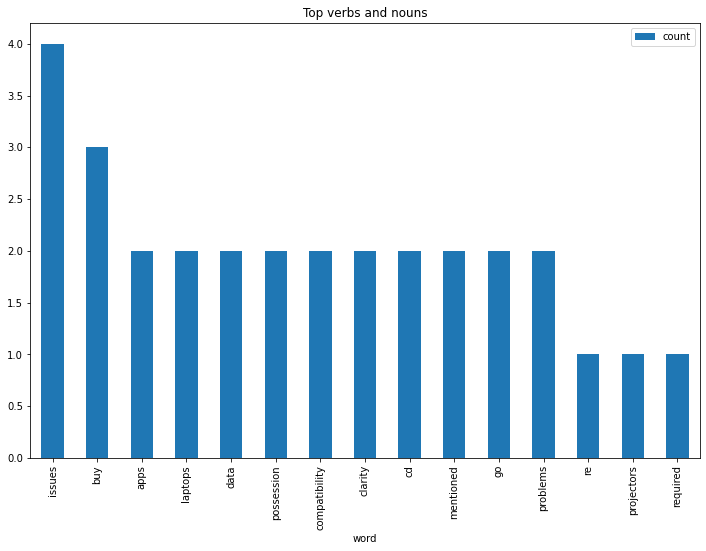

In [64]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:15].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

#All words
#wf_df.plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

#### Emotion Mining

In [65]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', error_bad_lines=False, sep = ",", encoding = 'latin-1')
afinn

C:\Users\Admin\AppData\Local\Temp\ipykernel_9972\3280789593.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  afinn = pd.read_csv('Afinn.csv', error_bad_lines=False, sep = ",", encoding = 'latin-1')


,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [66]:
afinn[1500:]

,word,value
1500,masterpieces,4
1501,matter,1
1502,matters,1
1503,mature,2
1504,meaningful,2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [112]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
from nltk import tokenize

sentences = tokenize.sent_tokenize(" ".join(book))

#sentences[5:15]
sentences

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession.",
 'Got it in 50k in Diwali sale.',
 'Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better.',
 'Terrific sense of possession & pride.Bad News.',
 'Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!',
 '), all printers are not compatible (e.g.',
 "the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unles

In [70]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
182,You can get one of the best movie experiences ...
183,Overall I would it a 4.5/5.
184,"I got a great deal on this laptop, which I hav..."
185,I got it not only on discount but also was abl...


In [71]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [131]:
nlp = spacy.load('en_core_web_sm')

In [75]:
mydict = {'A' : 3,
         'B' : 8,
         'C' : 2}

mydict.get('D', 0)

0

In [76]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [77]:
# test that it works
calculate_sentiment(text = 'Amazing, wonderful session')

8

In [78]:
calculate_sentiment(text = 'wonderful session')

4

In [79]:
calculate_sentiment(text = 'great job, best explanation ever')

6

In [80]:
calculate_sentiment(text = 'good')

3

In [81]:
calculate_sentiment(text = 'What a ridiculous')

-3

In [82]:
calculate_sentiment(text = 'worst product and worst service ever')

-6

In [83]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [84]:
sent_df

,sentence,sentiment_value
0,It's amazing..... battery last around 10 -12 h...,7
1,Got it in 50k in Diwali sale.,0
2,Technically good laptop.Good News.luxury produ...,5
3,Terrific sense of possession & pride.Bad News.,4
4,Problems will be there if you are switching fr...,-11
...,...,...
182,You can get one of the best movie experiences ...,3
183,Overall I would it a 4.5/5.,0
184,"I got a great deal on this laptop, which I hav...",3
185,I got it not only on discount but also was abl...,0


In [89]:
sent_df.iloc[4,0]

'Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!'

In [90]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
#sent_df['word_count'].head(10)
sent_df

,sentence,sentiment_value,word_count
0,It's amazing..... battery last around 10 -12 h...,7,17
1,Got it in 50k in Diwali sale.,0,7
2,Technically good laptop.Good News.luxury produ...,5,31
3,Terrific sense of possession & pride.Bad News.,4,7
4,Problems will be there if you are switching fr...,-11,65
...,...,...,...
182,You can get one of the best movie experiences ...,3,12
183,Overall I would it a 4.5/5.,0,6
184,"I got a great deal on this laptop, which I hav...",3,18
185,I got it not only on discount but also was abl...,0,18


In [94]:
sent_df.sort_values(by='sentiment_value').tail()

,sentence,sentiment_value,word_count
103,The switch was inspired by the awesome reviews...,6,13
59,I use this for music production and it works a...,7,30
0,It's amazing..... battery last around 10 -12 h...,7,17
151,..So now I m working with the external keyboar...,17,113
86,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [95]:
sent_df.sort_values(by='sentiment_value').head()

,sentence,sentiment_value,word_count
4,Problems will be there if you are switching fr...,-11,65
148,This is the worst apple product I have ever s...,-8,74
89,"?, god damn it apple (Though its not bad, have...",-6,43
175,The device never had any accidental drop or sh...,-5,17
121,Requires power input to restart again.Contacte...,-4,22


In [96]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    187.000000
mean       0.930481
std        3.350571
min      -11.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       24.000000
Name: sentiment_value, dtype: float64

In [97]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
1,Got it in 50k in Diwali sale.,0,7
4,Problems will be there if you are switching fr...,-11,65
5,"), all printers are not compatible (e.g.",0,7
7,you need to spend extra for an external CD wri...,0,16
10,"Marketing strategy for Indian market, if at al...",-3,15


In [98]:
sent_df[sent_df['sentiment_value']<-5]

,sentence,sentiment_value,word_count
4,Problems will be there if you are switching fr...,-11,65
89,"?, god damn it apple (Though its not bad, have...",-6,43
148,This is the worst apple product I have ever s...,-8,74


In [99]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence']

4      Problems will be there if you are switching fr...
89     ?, god damn it apple (Though its not bad, have...
148    This is the worst  apple product I have ever s...
Name: sentence, dtype: object

In [100]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()

['Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!',
 "?, god damn it apple (Though its not bad, have seen GeForce 940MX at the same price)No Force trackpadBezels are way too thick in today's standardsNo thunderbolt 3 or Usb CCan't detect Android Devices until Android Device Explorer is installedThe Storage is less!",
 'This is the worst  apple product I have ever seen ...6 month After purchase of this fake book ...some of its keys of keyboard  stopped working ...So the service center  replace my keyboard with the new one ...But after some months with  the new replaced  keyboard some of its key again stopped working .All these things happen in one year and 3 month timeline which

In [101]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

'Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!'

In [102]:
sent_df['index'] = range(0, len(sent_df))

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

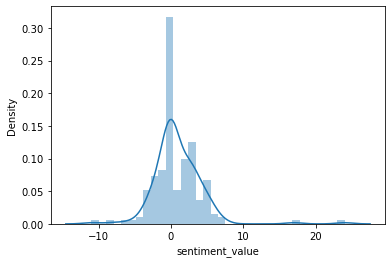

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

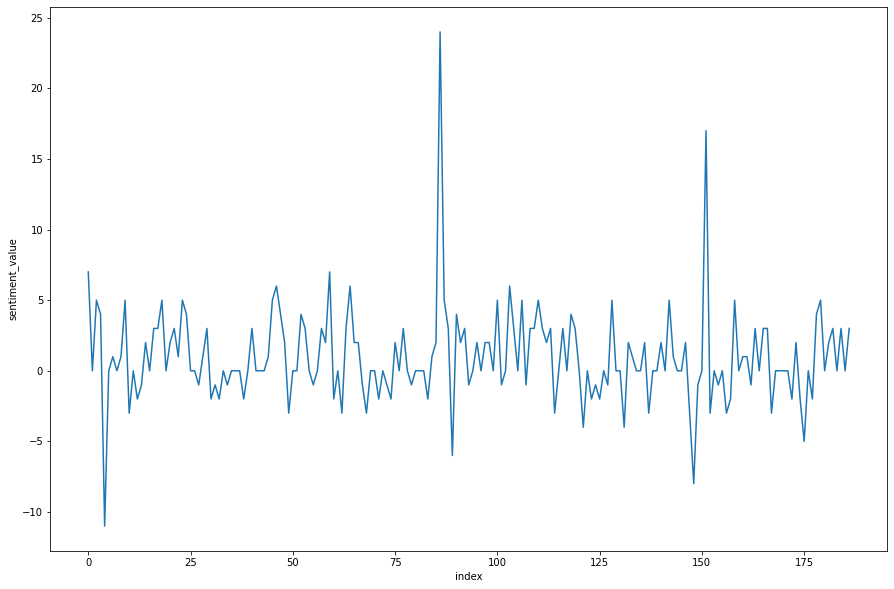

In [104]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

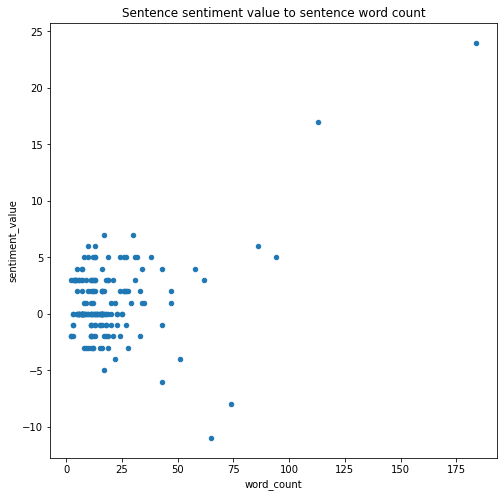

In [105]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(8,8),
                     title='Sentence sentiment value to sentence word count')

In [106]:
#from google.colab import drive
#drive.mount('/content/drive')